**Table of contents**<a id='toc0_'></a>    
- [Working with data in Python](#toc1_)    
  - [Indexing ("subsetting")](#toc1_1_)    
  - [Adding a variable](#toc1_2_)    
  - [Assignments to a subset of rows](#toc1_3_)    
  - [The index](#toc1_4_)    
  - [Series and numpy arrays](#toc1_5_)    
  - [Calling functions on a DataFrame](#toc1_6_)    
- [Data: Load, clean, and save](#toc2_)    
  - [Reading in data](#toc2_1_)    
  - [Getting the right columns and rows](#toc2_2_)    
  - [Renaming variables](#toc2_3_)    
  - [Summary statistics](#toc2_4_)    
- [Fetching data](#toc3_)    
  - [FRED (Federal Reserve Economic Data)](#toc3_1_)    
- [Combining data](#toc4_)    
- [Plotting data](#toc5_)    
- [List of some useful data sources](#toc6_)    
  - [World Bank indicator example](#toc6_1_)    
- [More on pandas](#toc7_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Working with data in Python](#toc0_)


If you have to handle data sets in Python, one of the best libraries to master is **Pandas**.  

In [1]:
import pandas as pd
import numpy as np
from IPython.display import display

In Pandas, the fundamental object of interest is a **pandas dataframe**. 

A pandas data frame is superficially like the data frames you know from stata: it is a 2-D object where each column has a name.

**A dataframe is essentially a matrix.**

* rows = observations 
* columns = variables 
* the index = keeps track of the rows' locations

The *data type* of a column in a pandas data frame is a **pandas series**.

A pandas series is **a lot like a numpy array** and they can be used in much the same way.  

A pandas data frame can be thought of as a **dictionary of pandas series**. (Keys are column names) 

To create a DataFrame:

In [2]:
ids = pd.Series([1, 2, 3]) # pd.Series() creates a pandas series, which is similar to 1-d numpy array but with axis labels
incomes = pd.Series([4000, 3000, 1500])
names = pd.Series(['Anna', 'Billy', 'Claudia'])

# Use data frame definition
X = pd.DataFrame({'id': ids, 'inc':incomes, 'name': names})
display(X)

## Alternatively you can use numpy arrays
import numpy as np

ids2 = np.array([1, 2, 3])
incomes2 = np.array([4000, 3000, 1500])
names2 = np.array(['Anna', 'Billy', 'Claudia'])

# Use data frame definition
X2 = pd.DataFrame({'id': ids2, 'inc':incomes2, 'name': names2})
display(X2)

# Variables are cast into pandas series as the DataFrame is created
X = pd.DataFrame({'id': [1, 2, 3], 
                  'inc': [4000, 3000, 1500], 
                  'name': ['Anna', 'Billy', 'Claudia']}) 
type(X['id'])

# You can also pass in data as a list of lists and provide column names as argument
Y = pd.DataFrame(data = [[1,4000,'Anna'],
                         [2,3000,'Billy'],
                         [3,1500,'Claudia']], 
                 columns=['id','inc','name'])
display(Y)

,id,inc,name
0,1,4000,Anna
1,2,3000,Billy
2,3,1500,Claudia


,id,inc,name
0,1,4000,Anna
1,2,3000,Billy
2,3,1500,Claudia


,id,inc,name
0,1,4000,Anna
1,2,3000,Billy
2,3,1500,Claudia


In [3]:
ids = pd.Series([1, 2, 3]) # pd.Series() creates a pandas series, which is similar to 1-d numpy array but with axis labels
incomes = pd.Series([4000, 3000, 1500.0])
names = pd.Series(['Anna', 'Billy', 'Claudia'])

# Use data frame definition
X = pd.DataFrame({'id': ids, 'inc':incomes, 'name': names})
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      3 non-null      int64  
 1   inc     3 non-null      float64
 2   name    3 non-null      object 
dtypes: float64(1), int64(1), object(1)
memory usage: 204.0+ bytes


**General information:**

In [4]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      3 non-null      int64  
 1   inc     3 non-null      float64
 2   name    3 non-null      object 
dtypes: float64(1), int64(1), object(1)
memory usage: 204.0+ bytes


## <a id='toc1_1_'></a>[Indexing ("subsetting")](#toc0_)

**Choosing a subset of the rows and/or columns of a dataframe is known as "indexing"**. 

All pandas dataframes are born with the method `.loc[]` and `.iloc[]`:
1. `.iloc[]` is for **numeric indexing** 
2. `.loc[]` for **logical** and **name-based** indexing. 

Examples
* `df.iloc[0:3,1]` selects rows 0,1,2 and column 2.
* `df.loc[:, ['inc']]` selects all rows (indicated by `:`) but only the column (variable) `inc`. 
* `df.loc[df['inc'] == 4000, :]` selects the rows where the variable `inc` is equal to 4000 and all columns (indicated by `:`)
* `df.loc[df['inc'] == 4000, ['name']]` selects the variable `name` and shows the rows where `inc` is equal to 2002. 

*You cannot write*:  
`df.iloc[0:2, ['inc']]`  


In [5]:
# Select rows 0,1,2 and column 1 using .iloc
subset1 = X.iloc[0:3, 1]
display(subset1)

# Select all rows but only the column 'year' using .loc
subset2 = X.loc[:, ['inc']]
display(subset2)

# Select the rows where the variable 'year' is equal to 2002 and all columns
subset3 = X.loc[X['inc'] == 4000, :]
display(subset3)

# Select the variable 'name' and show the rows where 'year' is equal to 2002
subset4 = X.loc[X['inc'] == 4000, ['name']]
display(subset4)

# You cannot write: df.iloc[0:2, ['year']]
try:
    subset5 = X.iloc[0:2, ['inc']]
    display(subset5)
except Exception as e:
    print("Error with df.iloc[0:2, ['inc']]:", str(e))


0    4000.0
1    3000.0
2    1500.0
Name: inc, dtype: float64

,inc
0,4000.0
1,3000.0
2,1500.0


,id,inc,name
0,1,4000.0,Anna


,name
0,Anna


Error with df.iloc[0:2, ['inc']]: .iloc requires numeric indexers, got ['inc']


In general, the **syntax** is `df.loc[CONDITION, [VARLIST]]`, where `CONDITION` is a vector of logical statements with the same length as the number of rows in the dataframe, and `VARLIST` is a list over variables. 

There are other ways of indexing in pandas with shorter syntax. I would focus on `.loc[]` in the begining as it very general.

In [6]:
# Use logical indexing to subset from variable name based on id
X.loc[X['id'] > 1, ['name']]

,name
1,Billy
2,Claudia


Subset all variables:

In [7]:
X.loc[X['id'] > 1]

,id,inc,name
1,2,3000.0,Billy
2,3,1500.0,Claudia


**Alternatives:**

You can first create a boolean series to indicate rows, you want to select.

In [8]:
I = X['id'] > 1
print(I)
X.loc[I, ['name']]

0    False
1     True
2     True
Name: id, dtype: bool


,name
1,Billy
2,Claudia


Use `.VARIABLE` notation:

Panda DataFrames have a very convenient way of selecting columns. You can use the `.` notation to select a column.
This is equivalent to `df['VARIABLE']`.

In [9]:
X.loc[(X.id > 1) & (X.inc > 1500), ['id','name']]

,id,name
1,2,Billy


Subsetting with numerical indexing works the same way as lists and arrays.  
**Syntax:** `df.iloc[ROW INDICES, [COLUMN INDICES]]`

In [10]:
display(X.iloc[0:2,[0,2]])

,id,name
0,1,Anna
1,2,Billy


## <a id='toc1_2_'></a>[Adding a variable](#toc0_)

Variables are added with `df['newvar'] = SOMETHING`. *The length must match or if you append a scalar or a bool, this is broadcastet to the full column length.

In [11]:
X['year'] = [2003, 2005, 2010]
X['grade'] = [1.3, 2.3, 1.7]
X['Yes'] = True
X

,id,inc,name,year,grade,Yes
0,1,4000.0,Anna,2003,1.3,True
1,2,3000.0,Billy,2005,2.3,True
2,3,1500.0,Claudia,2010,1.7,True


**Note:** You canNOT write `df.newvar = SOMETHING`.

The `SOMETHING` can be an **expression based on other variables**.

In [12]:
X['inc_diff'] = ((X.inc - X.inc.mean()) / X.inc.mean()) * 100
X

,id,inc,name,year,grade,Yes,inc_diff
0,1,4000.0,Anna,2003,1.3,True,41.176471
1,2,3000.0,Billy,2005,2.3,True,5.882353
2,3,1500.0,Claudia,2010,1.7,True,-47.058824


You can also `.apply(func)` a function to a column.

In [13]:
# take the square root of the inc column 
X.inc.apply(np.sqrt)

0    63.245553
1    54.772256
2    38.729833
Name: inc, dtype: float64

## <a id='toc1_3_'></a>[Assignments to a subset of rows](#toc0_)

You can also assign new values to a subset of elements from your dataframe.

**Multiple rows, one value:**

In [14]:
# Create copy of X to avoid overwriting it.
Y = X.iloc[:,0:4].copy()
Y.loc[Y.id > 1, ['name']] = 'no name'
print('Y After change in names:')
Y

Y After change in names:


,id,inc,name,year
0,1,4000.0,Anna,2003
1,2,3000.0,no name,2005
2,3,1500.0,no name,2010


**LHS:** Values selected using logical statement.<br>
**RHS:** Must either be:

1. a **single value** (all rows are set to this) 
2. a **list of values** with same length as the number of selected rows

**Multiple rows, multiple values:**

In [15]:
print('Original df:')
Y = X.iloc[:,0:4].copy()
display(Y)

# Subset the rows, where name is Anna or year is 2005. LHS is incidentally only 2 rows, which match the RHS!
I = (Y.name == 'Anna') | (Y.year == 2010)

# Print LHS
print('Subset of Y, LHS in assignment:')
display(Y.loc[I,:])

# Assignment
Y.loc[I, ['name']] = ['Alex', 'Claudia']

print('Final Y:')
Y

Original df:


,id,inc,name,year
0,1,4000.0,Anna,2003
1,2,3000.0,Billy,2005
2,3,1500.0,Claudia,2010


Subset of Y, LHS in assignment:


,id,inc,name,year
0,1,4000.0,Anna,2003
2,3,1500.0,Claudia,2010


Final Y:


,id,inc,name,year
0,1,4000.0,Alex,2003
1,2,3000.0,Billy,2005
2,3,1500.0,Claudia,2010


## <a id='toc1_4_'></a>[The index](#toc0_)

The **first column** in the dataset is referred to as the `index` of the dataframe.<br>
**Baseline:** If you haven't done anything, it is just `[0, 1, 2, ....]`.

In [16]:
X = pd.DataFrame({'id': [1, 2, 3], 
                  'inc': [4000, 3000, 1500], 
                  'name': ['Anna', 'Billy', 'Claudia'],
                  'year': [2010, 2010, 2019]}) 

# See the indices of X
print(X.index.values)

[0 1 2]


**Custom:** You can actually use any **unique** identifier. It does not have to be numbers. For example, you can assign the name column to be the index instead.

In [17]:
Y = X.set_index('name') # returns a copy
Y # notice name is now below the other variables

,id,inc,year
name,,,
Anna,1,4000,2010
Billy,2,3000,2010
Claudia,3,1500,2019


We could also have specified an index at creation of X

In [18]:
X = pd.DataFrame({'id': [1, 2, 3], 
                  'inc': [4000, 3000, 1500],
                  'year': [2010, 2010, 2019]}, 
                  index= ['Anna', 'Billy', 'Claudia'])
X

,id,inc,year
Anna,1,4000,2010
Billy,2,3000,2010
Claudia,3,1500,2019


In [19]:
# Use index of rows:
Y.loc['Anna',:]

id         1
inc     4000
year    2010
Name: Anna, dtype: int64

In [20]:
# See the indices of Y
print(Y.index.values)

['Anna' 'Billy' 'Claudia']


For time series data, it will be usefull to have a datetime index.

In [21]:
import pandas as pd

# Create a DataFrame with a datetime index
data = {
    'GDP': [1, 2, 3, 4, 5]
}
index = pd.date_range(start='2022-01-01', periods=5)
df = pd.DataFrame(data, index=index)

display(df)

,GDP
2022-01-01,1
2022-01-02,2
2022-01-03,3
2022-01-04,4
2022-01-05,5


When using time-series data with pandas you typically use datetimes as the index column.
You can also create datetime objects with the `datetime` module in Python. 

In [22]:
from datetime import datetime

# Create a datetime object
dt = datetime(2025, 4, 23, 15, 30)  # Year, Month, Day, Hour, Minute
print("Datetime object:", dt)

Datetime object: 2025-04-23 15:30:00


Datetimes objects allows for easy manipulation of dates and times.

In [23]:
# Create a datetime index with daily frequency
date_index = pd.date_range(start='2024-01-01', end='2025-10-01', freq='D')
print("Datetime Index:\n", date_index[1:3])

# Create a DataFrame with a datetime index
data = {'value': np.arange(len(date_index))}
df = pd.DataFrame(data, index=date_index)
print("DataFrame with Datetime Index:\n", df.iloc[1:3,:])

# Transform to weekly data by using the mean of the daily values
weekly_data = df.resample('W').mean()
print("Weekly Resampled Data:\n", weekly_data[1:3])

Datetime Index:
 DatetimeIndex(['2024-01-02', '2024-01-03'], dtype='datetime64[ns]', freq='D')
DataFrame with Datetime Index:
             value
2024-01-02      1
2024-01-03      2
Weekly Resampled Data:
             value
2024-01-14   10.0
2024-01-21   17.0


In [24]:

# Transform to quarterly data by using the first value of the quarter
quarterly_date = df.resample('QS').first()    # QS indicates the date is the first of the quarter
print("QS with .first():\n", quarterly_date[1:4])

quarterly_date = df.resample('QE').last()    # QE indicates the date is the end of the quarter
print("QE with .last():\n", quarterly_date[1:4])

# A convenient option is often to use .ffill() (forward fill) which takes the last valid observation.
# This is useful for time series data where you want to fill in missing values with the last known value.
quarterly_date = df.resample('QE').ffill()   
print("QE with .ffill():\n", quarterly_date[1:4])

QS with .first():
             value
2024-04-01     91
2024-07-01    182
2024-10-01    274
QE with .last():
             value
2024-06-30    181
2024-09-30    273
2024-12-31    365
QE with .ffill():
             value
2024-06-30    181
2024-09-30    273
2024-12-31    365


## <a id='toc1_5_'></a>[Series and numpy arrays](#toc0_)

When you select an individual variable, it is of class `Series`. Some functions work on a pandas series (e.g. most numpy functions), but it is sometimes nice to extract the underlying numpy objects: 

* `df`: **pandas dataframe** 
* `df['variable']`: **pandas series**
* `df['variabe'].values` (or `.to_numpy()`): **numpy array**

In [25]:
# One way to do it
X.inc.to_numpy()

array([4000, 3000, 1500])

In [26]:
# Another way
display(X.inc.values)
type(X.inc.values)

array([4000, 3000, 1500])

numpy.ndarray

## <a id='toc1_6_'></a>[Calling functions on a DataFrame](#toc0_)

You could create the `inc_diff` column, by applying a function to the `inc`column:

In [27]:
def perc_diff(x):
    return ((x - x.mean()) / x.mean()) * 100
# or use a lambda function
perc_diff = lambda x: ((x - x.mean()) / x.mean()) * 100

X['inc_diff'] = perc_diff(X.inc)
X

,id,inc,year,inc_diff
Anna,1,4000,2010,41.176471
Billy,2,3000,2010,5.882353
Claudia,3,1500,2019,-47.058824


In [28]:
# use .drop() to remove a column
X.drop('inc_diff', axis=1)

,id,inc,year
Anna,1,4000,2010
Billy,2,3000,2010
Claudia,3,1500,2019


**Row-by-row**  
Create function that takes row as an argument, and then **apply** the action of the function along the row dimension (axis=1).

In [29]:
Y = pd.DataFrame({'id': [1, 2, 3], 
                  'inc': [4000, 3000, 1500],
                  'year': [2010, 2010, 2019], 
                  'name': ['Anna', 'Billy', 'Claudia']})

display(Y)

# Notice that row is an input argument here
def conc_row_wise(row):
    return str(row['year']) + ' - ' + row['name'] 

# The fact that row is an input argument in the conc_row_wise function is implicitly understood by .apply()
Y['year_name'] = Y.apply(conc_row_wise, axis=1)  # Notice that axis = 1 is going down rows. Kind of confusing. 
Y

,id,inc,year,name
0,1,4000,2010,Anna
1,2,3000,2010,Billy
2,3,1500,2019,Claudia


,id,inc,year,name,year_name
0,1,4000,2010,Anna,2010 - Anna
1,2,3000,2010,Billy,2010 - Billy
2,3,1500,2019,Claudia,2019 - Claudia


There are many methods available do DataFrames. You can see them by typing `dir(df)`.

This [Cheat Sheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf) is also very useful.

In [30]:
print(dir(Y))

['T', '_AXIS_LEN', '_AXIS_ORDERS', '_AXIS_TO_AXIS_NUMBER', '_HANDLED_TYPES', '__abs__', '__add__', '__and__', '__annotations__', '__array__', '__array_priority__', '__array_ufunc__', '__arrow_c_stream__', '__bool__', '__class__', '__contains__', '__copy__', '__dataframe__', '__dataframe_consortium_standard__', '__deepcopy__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__divmod__', '__doc__', '__eq__', '__finalize__', '__floordiv__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__iadd__', '__iand__', '__ifloordiv__', '__imod__', '__imul__', '__init__', '__init_subclass__', '__invert__', '__ior__', '__ipow__', '__isub__', '__iter__', '__itruediv__', '__ixor__', '__le__', '__len__', '__lt__', '__matmul__', '__mod__', '__module__', '__mul__', '__ne__', '__neg__', '__new__', '__nonzero__', '__or__', '__pandas_priority__', '__pos__', '__pow__', '__radd__', '__rand__', '__rdivmod__', '__reduce__', '__reduce_ex__', 

For instance, we can calculate a percentage change on a series by calling `.pct_change()` on the DataFrame.
What you will most likely also use is to shift you time series by some periods to create lags and leads. You can do this by calling `.shift(n)`, where `n` is the number of periods, you want to shift a series.

In [31]:
# Generate a time series data
dates = pd.date_range(start='2022-01-01', periods=5)
data = np.random.randn(5)
ts = pd.Series(data, index=dates)

print("Original Time Series:")
print(ts)

# Apply pct_change function to calculate the percentage change
ts_pct_change = ts.pct_change()
print("\nPercentage Change:")
print(ts_pct_change)

# Apply shift function to shift the index
ts_shifted = ts.shift(1)
print("\nShifted Time Series:")
print(ts_shifted)

Original Time Series:
2022-01-01   -1.113994
2022-01-02   -0.138221
2022-01-03    0.369228
2022-01-04   -1.650172
2022-01-05    0.512972
Freq: D, dtype: float64

Percentage Change:
2022-01-01         NaN
2022-01-02   -0.875923
2022-01-03   -3.671294
2022-01-04   -5.469244
2022-01-05   -1.310860
Freq: D, dtype: float64

Shifted Time Series:
2022-01-01         NaN
2022-01-02   -1.113994
2022-01-03   -0.138221
2022-01-04    0.369228
2022-01-05   -1.650172
Freq: D, dtype: float64


# <a id='toc2_'></a>[Data: Load, clean, and save](#toc0_)

Here you will learn:
1. how to **load and save data** both to and from offline sources (e.g. CSV or Excel). 
2. and how to clean, rename, structure and index your data.

In [32]:
import pandas as pd

**Check:** We make sure that we have the **data/** subfolder, and that it has the datasets we need.

In [34]:
import os 

# Using assert to check that paths exist on computer.
assert os.path.isdir('data/')
assert os.path.isfile('data/ramey_data_modified.xlsx')

# Print everything in data
os.listdir('data/')

['ramey_data_modified.xlsx']

## <a id='toc2_1_'></a>[Reading in data](#toc0_)

Pandas offers a lot of facilities for **reading and writing to different formats**. Some examples of functions that let you do that are:

* CSV: `pd.read_csv()`
* Excel: `pd.read_excel()`
* Stata: `pd.read_stata()`

**Inspecting:** 

* `df.head(10)` is used to inspect the first 10 rows
* `df.sample(10)` is used to look at 10 random rows

In [35]:
filename = 'data/ramey_data_modified.xlsx' # open the file and have a look at it
pd.read_excel(filename).head(5)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,DATES,NaN,NaN,NaN,NaN,UNEMP,LCPI,FFR,LPCOM,LRCDUR,LRCND,LRCSV,RRSHOCK,CUMRRSHOCK
2,1969-01-01 00:00:00,NaN,NaN,NaN,3.676827,3.4,3.575151,6.3,4.633563,2.718265,3.699028,3.312912,0,0
3,1969-02-01 00:00:00,NaN,NaN,NaN,3.683206,3.4,3.577948,6.61,4.655388,2.721427,3.707922,3.318468,0,0
4,1969-03-01 00:00:00,NaN,NaN,NaN,3.691017,3.4,3.586293,6.79,4.665607,2.698471,3.706793,3.317526,-0.231698,-0.231698


We need to clean this **mess** up.

## <a id='toc2_2_'></a>[Getting the right columns and rows](#toc0_)

**Skipping rows:** Clearly, we should **skip** the first row and the second, third and fourth columns.

In [36]:
mp_data = pd.read_excel(filename, skiprows=2)
mp_data.head(5)

,DATES,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,UNEMP,LCPI,FFR,LPCOM,LRCDUR,LRCND,LRCSV,RRSHOCK,CUMRRSHOCK
0,1969-01-01,NaN,NaN,NaN,3.676827,3.4,3.575151,6.30,4.633563,2.718265,3.699028,3.312912,0.000000,0.000000
1,1969-02-01,NaN,NaN,NaN,3.683206,3.4,3.577948,6.61,4.655388,2.721427,3.707922,3.318468,0.000000,0.000000
2,1969-03-01,NaN,NaN,NaN,3.691017,3.4,3.586293,6.79,4.665607,2.698471,3.706793,3.317526,-0.231698,-0.231698
3,1969-04-01,NaN,NaN,NaN,3.687328,3.4,3.591818,7.41,4.680092,2.710713,3.705245,3.323020,0.456873,0.225175
4,1969-05-01,NaN,NaN,NaN,3.683543,3.4,3.594569,8.67,4.698661,2.710913,3.714304,3.329916,0.210627,0.435802


**Dropping columns:** The first three columns after "DATES" are not needed and contain only missing values (denoted by `NaN` (not-a-number)), so we will drop those. 

**Note:** `df.drop()` is a function that the data frame object applies to itself. Hence, no return value is used.  

In [37]:
# These columns have to go: 'Unnamed: 0' 'Unnamed: 1' 'Unnamed: 2' 'Unnamed: 3'
drop_these = ['Unnamed: ' + str(num) for num in range(1,4)] # use list comprehension to create list of columns
print(drop_these)

mp_data.drop(drop_these, axis=1, inplace=True) # axis = 1 -> columns, inplace=True -> changed, no copy made
mp_data.head(5)

['Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3']


,DATES,Unnamed: 4,UNEMP,LCPI,FFR,LPCOM,LRCDUR,LRCND,LRCSV,RRSHOCK,CUMRRSHOCK
0,1969-01-01,3.676827,3.4,3.575151,6.30,4.633563,2.718265,3.699028,3.312912,0.000000,0.000000
1,1969-02-01,3.683206,3.4,3.577948,6.61,4.655388,2.721427,3.707922,3.318468,0.000000,0.000000
2,1969-03-01,3.691017,3.4,3.586293,6.79,4.665607,2.698471,3.706793,3.317526,-0.231698,-0.231698
3,1969-04-01,3.687328,3.4,3.591818,7.41,4.680092,2.710713,3.705245,3.323020,0.456873,0.225175
4,1969-05-01,3.683543,3.4,3.594569,8.67,4.698661,2.710913,3.714304,3.329916,0.210627,0.435802


> **Alternative:** Use `del empl['Unnamed: 0'], empl['Unnamed: 1']..`.  

**But!** that borders on code repetition.. Would give you 4 places to make code changes rather than 2 as with the list comprehension above, in case data changed. 

## <a id='toc2_3_'></a>[Renaming variables](#toc0_)

We are not happy with the column comprising the log of industrial production, which is currently called `Unnamed: 4`.   

We rename using `df.rename(columns=dict)`, where dict must be a Python *dictionary*. Why a dictionary? It is simply the most practical solution if you are renaming several columns at once. 

In [38]:
mp_data.rename(columns = {'Unnamed: 4':'LIP'}, inplace=True)
mp_data.head(5)

,DATES,LIP,UNEMP,LCPI,FFR,LPCOM,LRCDUR,LRCND,LRCSV,RRSHOCK,CUMRRSHOCK
0,1969-01-01,3.676827,3.4,3.575151,6.30,4.633563,2.718265,3.699028,3.312912,0.000000,0.000000
1,1969-02-01,3.683206,3.4,3.577948,6.61,4.655388,2.721427,3.707922,3.318468,0.000000,0.000000
2,1969-03-01,3.691017,3.4,3.586293,6.79,4.665607,2.698471,3.706793,3.317526,-0.231698,-0.231698
3,1969-04-01,3.687328,3.4,3.591818,7.41,4.680092,2.710713,3.705245,3.323020,0.456873,0.225175
4,1969-05-01,3.683543,3.4,3.594569,8.67,4.698661,2.710913,3.714304,3.329916,0.210627,0.435802


**A big NO-NO!!** is to put *white spaces* in column names. You can theoretically have a column such as empl['e 2017'] in a pandas df, but this is *very likely* to get messy. And you can no longer use `.`notation. 

**Extract:** Now we can find the unemployment rate in December of 1970: 

In [39]:
mp_data.UNEMP.loc[mp_data.DATES ==  pd.to_datetime('1984-11-1')]

190    7.2
Name: UNEMP, dtype: float64

## <a id='toc2_4_'></a>[Summary statistics](#toc0_)

To get an overview of employments across municipalities we can use the function `df.describe()`.

In [40]:
mp_data.describe()

,DATES,LIP,UNEMP,LCPI,FFR,LPCOM,LRCDUR,LRCND,LRCSV,RRSHOCK,CUMRRSHOCK
count,468,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,4.680000e+02,468.000000
mean,1988-06-16 01:50:46.153846144,4.148517,6.060256,4.650666,6.610385,5.452904,3.612288,4.137169,4.004456,4.273504e-10,-2.539778
min,1969-01-01 00:00:00,3.628575,3.400000,3.575151,0.980000,4.633563,2.608451,3.699028,3.312912,-3.250249e+00,-8.613419
25%,1978-09-23 12:00:00,3.912534,5.100000,4.203939,4.755000,5.397031,3.102252,3.913666,3.701481,-9.281740e-02,-4.465086
50%,1988-06-16 00:00:00,4.141902,5.800000,4.772799,5.835000,5.512723,3.608415,4.133411,4.035094,0.000000e+00,-2.712219
75%,1998-03-08 18:00:00,4.470279,7.100000,5.087905,8.460000,5.631239,4.048087,4.358697,4.335145,6.834065e-02,-0.073113
max,2007-12-01 00:00:00,4.655465,10.800000,5.353965,19.100000,6.026132,4.734812,4.640788,4.611510,1.875421e+00,1.061123
std,NaN,0.301406,1.438519,0.527932,3.383201,0.290041,0.597815,0.274538,0.380311,2.963192e-01,2.421871


**Single descriptive statistic:** We can also just get the mean for each year (on rows indicated by axis=0):

In [41]:
mp_data.iloc[:,1:].mean(axis=0)

LIP           4.148517e+00
UNEMP         6.060256e+00
LCPI          4.650666e+00
FFR           6.610385e+00
LPCOM         5.452904e+00
LRCDUR        3.612288e+00
LRCND         4.137169e+00
LRCSV         4.004456e+00
RRSHOCK       4.273504e-10
CUMRRSHOCK   -2.539778e+00
dtype: float64

As with reading in data, we have the corresponding functions for **writing data**:

* CSV: `pd.to_csv()`
* Excel: `pd.to_excel()`
* Stata: `pd.to_stata()`

Let's **save our dataset to CSV form**. We will set `index=False` to avoid saving the index (which does not mean anything here but can in other contexts be an annoying thing). 

In [42]:
mp_data.to_csv('data/ramey_data_clean.csv', index=False)

# <a id='toc3_'></a>[Fetching data](#toc0_)

You can also get data directly from databases using APIs (**Application Programming Interface**). An API is an interface through which we can directly ask for and **receive data from an online source**. Fetching data from an API requires an **internet connection** and works directly without saving data to your harddisk (unless you ask Python to do so afterwards). You can use it to automate tasks such as fetching the most recent data, doing some calculations and outputting it in the same manner. An in-depth explanation of how to do this goes beyond the scope of this course. However, if you work a lot with data, this is something you might eventually need to look into.

Here, we will only show a couple of examples that might be of your interest for your Bachelor Thesis. In particular, we will only be using a Python package called `pandas_datareader`, which allow to get online data from some useful sources.

Two examples
- FRED
- World Bank

In [43]:
import numpy as np
import pandas as pd
import datetime

import pandas_datareader # install with `conda install -c anaconda pandas-datareader` or `pip install pandas-datareader` if you use base python

## <a id='toc3_1_'></a>[FRED (Federal Reserve Economic Data)](#toc0_)

We'll be using the [pandas_datareader](https://pandas-datareader.readthedocs.io/en/latest/index.html) package.

**GDP data** for the US

In [44]:
# Need first to encode dates in a python friendly to specify the length of the desired time period. 
# Use the datetime module - it is the general way to handle dates in python. 
start = datetime.datetime(2005,1,1)
end = datetime.datetime(2017,1,1)
timespan = end - start # We can investigate the precise time span by just subtracting to time variables.
print('total number of days:', timespan.days) # The timespan object has a days attribute.

total number of days: 4383


In [45]:
# Call the FRED api using pandas_datareader 
gdp = pandas_datareader.data.DataReader('GDP', 'fred', start, end)
gdp.head(10)

,GDP
DATE,
2005-01-01,12767.286
2005-04-01,12922.656
2005-07-01,13142.642
2005-10-01,13324.204
2006-01-01,13599.160
2006-04-01,13753.424
2006-07-01,13870.188
2006-10-01,14039.560
2007-01-01,14215.651


**Finding data:**

1. go to https://fred.stlouisfed.org 
2. search for data in main bar, e.g. employment and unemployment
3. click the first links
4. table name is next to header 

We now want to pull down data on aggregate employment (PAYEMS) and unemployment (UNEMPLOY) levels and then plot the development. 

**Pulling the data:**

In [46]:
start = datetime.datetime(1939,1,1)
end = datetime.datetime(2021,12,1)

# We can pull from multiple sources in one go. Just combine them in a list.
empl_us = pandas_datareader.data.DataReader(['PAYEMS', 'UNEMPLOY'], 'fred', start, end)

# <a id='toc4_'></a>[Combining data](#toc0_)

Often, you have data in different dataframes that you want to combine.

The most common operations are is `.concat([df1, df2], axis=0)` which appends rows (axis=0) or columns (axis=1) of DataFrames




In [47]:
start = datetime.datetime(1939,1,1)
end = datetime.datetime(2021,12,1)

# We can pull from multiple sources in one go. Just combine them in a list.
empl_us = pandas_datareader.data.DataReader(['PAYEMS', 'UNEMPLOY'], 'fred', start, end)
gdp_us = pandas_datareader.data.DataReader('GDP', 'fred', start, end)

df_combined = pd.concat([empl_us, gdp_us], axis=1)

Often, you want to reshape your data based on some criteria. Consider the following example, where you have some panel data for real GDP per capita.


In [48]:
start = datetime.datetime(1991,1,1)
real_gdp_france = pandas_datareader.data.DataReader('CLVMNACSCAB1GQFR', 'fred', start, end).rename(columns = {'CLVMNACSCAB1GQFR': 'RGDP_FR'})
real_gdp_germany = pandas_datareader.data.DataReader('CLVMNACSCAB1GQDE', 'fred', start, end).rename(columns = {'CLVMNACSCAB1GQDE': 'RGDP_DE'})

df = pd.concat([real_gdp_france, real_gdp_germany], axis=1)
df.head(5)

,RGDP_FR,RGDP_DE
DATE,,
1991-01-01,354340.9,517733.8
1991-04-01,355649.4,515466.2
1991-07-01,357091.2,514515.3
1991-10-01,358814.4,521756.9
1992-01-01,361380.8,529126.3


If you want to combine your data for real GDP, you could `.melt()` the data.

In [49]:
df2 = pd.melt(df)
df2

,variable,value
0,RGDP_FR,354340.9
1,RGDP_FR,355649.4
2,RGDP_FR,357091.2
3,RGDP_FR,358814.4
4,RGDP_FR,361380.8
...,...,...
243,RGDP_DE,749298.1
244,RGDP_DE,740960.2
245,RGDP_DE,759831.7
246,RGDP_DE,760124.3


In [50]:
# cleanup
df2.rename(columns = {'variable': 'Country', 'value': 'RGDP'}, inplace=True)
df2.Country = df2.Country.str.replace('RGDP_', '')
df2

,Country,RGDP
0,FR,354340.9
1,FR,355649.4
2,FR,357091.2
3,FR,358814.4
4,FR,361380.8
...,...,...
243,DE,749298.1
244,DE,740960.2
245,DE,759831.7
246,DE,760124.3


# <a id='toc5_'></a>[Plotting data](#toc0_)

You want to visualize your data for a better understanding or to present it to others. 
One of the most common packages for plotting in Python is **matplotlib**. We will use the `pyplot` module from matplotlib. For a longer tutorial see this [link](https://matplotlib.org/stable/tutorials/pyplot.html).

In [51]:
import matplotlib.pyplot as plt
# update some standard values
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

**Constructing a plot-object in matplotlib**
1. `fig` is the figure object. You can think of it at a top-level container that holds all the objects you will use to construct a plot.
2. `ax` is a reference to a specific subplot on the canvas
3. Use the `ax` reference to put a diagram into the empty subplot

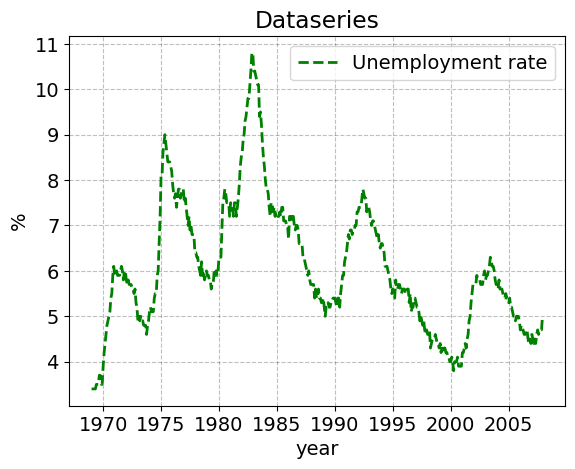

In [52]:
# a. create the figure
fig = plt.figure()

# b. plot
ax = fig.add_subplot(1,1,1)

ax.plot(mp_data.DATES,mp_data.UNEMP, label='Unemployment rate', color='green', linestyle='--', linewidth=2)

ax.set_title('Dataseries')
ax.set_xlabel('year')
ax.set_ylabel('%')
ax.legend(loc='upper right')


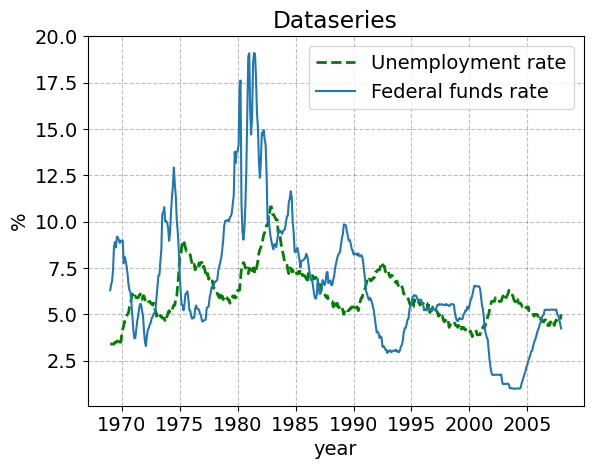

In [53]:
# You can have multiple series on the same axis
ax.plot(mp_data.DATES,mp_data.FFR, label='Federal funds rate')
ax.legend()
fig

In [54]:
# Save the figure
fig.savefig('fig1.png')

If you want to create a grid of subplots:

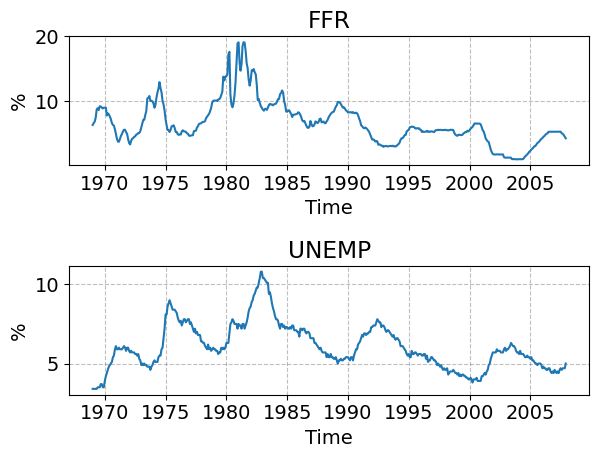

In [55]:
fig = plt.figure()  # Create a new figure

# Add a subplot for 'FFR'
ax1 = fig.add_subplot(2, 1, 1)  # 2 rows, 1 column, first plot
ax1.plot(mp_data.DATES, mp_data.FFR)
ax1.set_title('FFR')

# Add a subplot for 'UNEMP'
ax2 = fig.add_subplot(2, 1, 2)  # 2 rows, 1 column, second plot
ax2.plot(mp_data.DATES, mp_data.UNEMP)
ax2.set_title('UNEMP')

# Set the x-label for both plots in one line
for ax in [ax1, ax2]:
    ax.set_xlabel('Time')
    ax.set_ylabel('%')

plt.tight_layout()  # Adjusts subplot params so that subplots fit into the figure area
plt.show()

Alternatively, you can plot from pandas directly.

Text(0, 0.5, 'employment (US)')

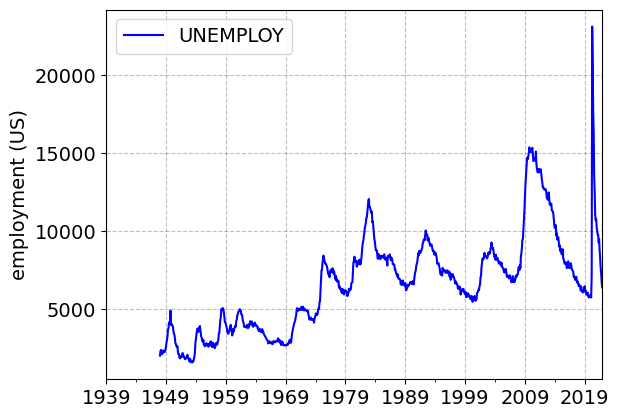

In [56]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

# Now we are just plotting directly from the pandas dataframe. Still using matplotlib under the hood.
empl_us.UNEMPLOY.plot(ax=ax, color='blue')

ax.legend(frameon=True)
ax.set_xlabel('')
ax.set_ylabel('employment (US)')

**This was just a brief introduction to Pandas and how to work with data in Python. There are many more topics that an advanced user should know. For that, I recommend you to look at Pandas documentation as well as the following links:**

1. Official [tutorials](https://pandas.pydata.org/pandas-docs/stable/getting_started/tutorials.html)
2. DataCamp's [pandas' cheat sheet](https://www.datacamp.com/community/blog/python-pandas-cheat-sheet)

# <a id='toc6_'></a>[List of some useful data sources](#toc0_)

* European-centric sources:
    
    - Eurostat: official source for statistical data on the European Union, member states and sub-state regions
        
    - ECB Statistical Data Warehouse: Data on Euro area monetary policy, financial stability and the activities of the European System of Central Banks (ESCB), with aggregate series based on observations from national central banks, credit institutions and inter- national data sources.
        
    - Data Europa EU (the former European Data Portal) provides access to over a million public datasets from 36 countries (European Union member states, the EEA, Switzer- land and countries in the EU Neighbourhood Policy programme). Data resources are indexed by the European Commission from national, regional, local and domain-specific public data providers.
        
* US-centric sources:
    
    - FRED database: User-friendly database of U.S. and international time series data maintained by the Federal Reserve Bank of St. Louis

    - Federal Reserve Board: provides data on bank structure, assets and liabilities, financial accounts, household finance, exchange rates among other (e.g. Distributional Financial Accounts)
        
    - Bureau of Labor Statistics (BLS): publishes data on unemployment and consumer prices, as well as a host of data related to the U.S. labor force
        
    - Bureau of Economic Analysis (BEA): compiles extensive data on gross domestic product (GDP), personal income, and corporate profits (e.g. NIPA)
        
    - National Bureau of Economic Research (NBER): hosts data covering the U.S. economy, industry, and international trade
        
    - Congressional Budget Office: data on federal spending and revenue, projections of future spending and deficits, and forecasts

    - IRS: data on taxes

    - NBER Public Use Data Archive: contains a myriad of different datasets (e.g. TAXSIM, Macrohistory Database, etc.)
        
* Worldwide:
    -  Central or national banks maintain many macroeconomic statistics

    -  World Bank maintains many large datasets across most countries, including the World Development Indicators (WDI) database and the Global Financial Development Database (GFDD). While they maintain an extensive set of data series with expansive country coverage, there are some missing data issues in many of the series.    

    -  Bank for International Settlements: datasets on international banking, debt securities, credit, global liquidity, derivatives, foreign exchange, property prices,

    -  United Nations maintains numerous databases, tables, and glossaries containing over 60 million data points covering international economic, health, education, and development data.    

    -  OECD.Stat includes data and metadata for OECD countries and selected non-member economies.

* Others/Data aggregator 
    - Our World in Data 

    - DB NOMICS
    
    - Datastream and EIKON


## <a id='toc6_1_'></a>[World Bank indicator example](#toc0_)

[Documentation](https://pandas-datareader.readthedocs.io/en/latest/readers/world-bank.html)

**Finding data:**

1. go to https://data.worldbank.org/indicator/
2. search for GDP 
3. variable name ("NY.GDP.PCAP.KD") is in the URL

**Pull GDP numbers:**

In [57]:
# Need a different module than in the FRED case
from pandas_datareader import wb

In [58]:
wb_gdp = wb.download(indicator='NY.GDP.PCAP.KD', country=['DE','US','ES'], start=1990, end=2017)

wb_gdp = wb_gdp.rename(columns = {'NY.GDP.PCAP.KD':'GDP'})
wb_gdp = wb_gdp.reset_index()
wb_gdp.sample(5)

C:\Users\Admin2\AppData\Local\Temp\ipykernel_38716\2958643297.py:1: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  wb_gdp = wb.download(indicator='NY.GDP.PCAP.KD', country=['DE','US','ES'], start=1990, end=2017)


,country,year,GDP
39,Spain,2006,26899.092151
78,United States,1995,41710.820725
45,Spain,2000,24106.881844
7,Germany,2010,38517.439786
57,United States,2016,57658.670883


In [59]:
wb_gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  84 non-null     object 
 1   year     84 non-null     object 
 2   GDP      84 non-null     float64
dtypes: float64(1), object(2)
memory usage: 2.1+ KB


**Problems:** 
* It turns out that the dataframe has stored the variable *year* as an "object", meaning in practice that it is a string. This must be converted to an int, as we want to use it as a number. 
* *country* is in fact a text variable, so it is acceptable to have it as an object type. But pandas has implemented a string type on its own. It is called 'string', while the text type of object that you normally encounter is of type 'str'. Yes, confusing!!  But you want to get it right, because an object variable can also contain numbers in addition to text. Which is bad. 
* Fortunately, GDP Growth is a float (i.e. a number). 

In [60]:
wb_gdp.year = wb_gdp.year.astype(int) # convert year
wb_gdp.country = wb_gdp.country.astype('string') # convert country to the special pandas string type
wb_gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  84 non-null     string 
 1   year     84 non-null     int64  
 2   GDP      84 non-null     float64
dtypes: float64(1), int64(1), string(1)
memory usage: 2.1 KB


* About strings and the `object` type in pandas, see [here](https://towardsdatascience.com/why-we-need-to-use-pandas-new-string-dtype-instead-of-object-for-textual-data-6fd419842e24) and [here](https://pandas.pydata.org/docs/user_guide/text.html).

**Fetch employment-to-population ratio:**

In [61]:
wb_empl = wb.download(indicator='SL.EMP.TOTL.SP.ZS', country=['DE','US','ES'], start=1990, end=2017) # don't need the special datetime here.
wb_empl.rename(columns = {'SL.EMP.TOTL.SP.ZS':'employment_to_pop'}, inplace=True) # Better col name
wb_empl.reset_index(inplace = True)
wb_empl.year = wb_empl.year.astype(int)
wb_empl.sample(3)

C:\Users\Admin2\AppData\Local\Temp\ipykernel_38716\3749591259.py:1: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  wb_empl = wb.download(indicator='SL.EMP.TOTL.SP.ZS', country=['DE','US','ES'], start=1990, end=2017) # don't need the special datetime here.


,country,year,employment_to_pop
57,United States,2016,59.391
67,United States,2006,62.162
45,Spain,2000,45.599


**Merge:**

In [62]:
wb = pd.merge(wb_gdp, wb_empl, how = 'outer', on = ['country','year']);
wb.head(5)

,country,year,GDP,employment_to_pop
0,Germany,1990,29747.690941,NaN
1,Germany,1991,31040.293563,56.430
2,Germany,1992,31425.647608,55.340
3,Germany,1993,30915.872885,54.055
4,Germany,1994,31609.110286,53.562


In [63]:
wb.shape

(84, 4)

# <a id='toc7_'></a>[More on pandas](#toc0_)

This [Cheat Sheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf) gives you a quick overview over the most important operations.